In [23]:
from sklearn.datasets import make_regression
import pandas as pd

data = make_regression(n_samples = 100, n_features = 3, 
                       random_state = 1)
features = pd.DataFrame(data[0])
labels = pd.DataFrame(data[1])

In [24]:
from sklearn.linear_model import SGDRegressor
features['bias'] = 1

In [25]:
import numpy as np
def train(features, labels):
    sgdr = SGDRegressor()
    sgdr.fit(features, labels)
    return sgdr.coef_[0]
def feedforward(features, weights):
    predictions = np.dot(features, weights)
    return predictions
    

In [26]:
train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)

/home/jane/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jane/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.datasets import make_classification
class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = class_data[0]
class_labels = class_data[1]

In [28]:
from sklearn.linear_model import SGDClassifier
def log_train(class_features, class_labels):
    sg = SGDClassifier()
    sg.fit(class_features, class_labels)
    return sg.coef_
def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))
def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(features, log_train_weights.T)
    log_predictions = sigmoid(linear_combination)
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    return log_predictions

log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)

/home/jane/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


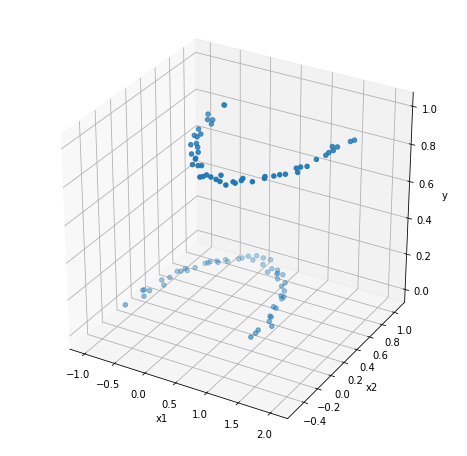

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(8)

features["bias"] = 1
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = labels.iloc[0:mid_length]
test_labels = labels.iloc[mid_length: len(labels)]

mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)

lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, log_predictions)

print(nn_accuracy)
print(log_accuracy)


0.5
0.48


In [31]:
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)

    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)

print(accuracies)

[0.5, 0.5, 0.5, 0.56, 0.54, 0.54]


In [36]:
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = labels.iloc[0:mid_length]
test_labels = labels.iloc[mid_length: len(labels)]

neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

[0.5, 0.5, 0.5, 0.56, 0.5, 0.5]


/home/jane/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
from sklearn.datasets import load_digits
digits = load_digits()

y = pd.Series(digits.target).astype('int').astype('category')
X = pd.DataFrame(digits.data)

In [58]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


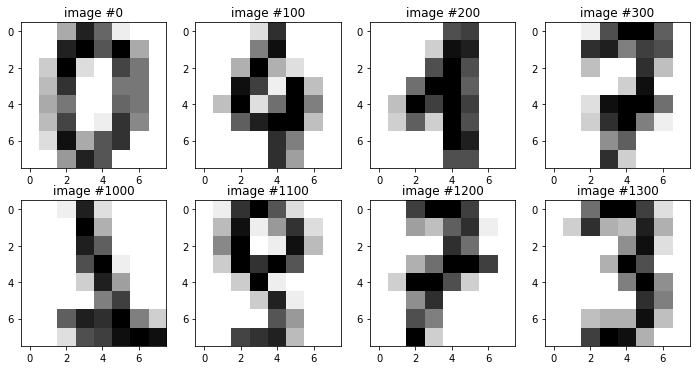

In [64]:
fig = plt.figure(figsize = (12,6))
images = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
for i in range(len(images)):
    ax = fig.add_subplot(2,4,i+1)
    image = X.iloc[images[i]]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    ax.imshow(np_image, cmap = 'gray_r')
    ax.set_title('image #{}'.format(images[i]))

plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
X["bias"] = 1
shuffled_index = np.random.permutation(X.index)
shuffled_X = X.loc[shuffled_index]
third_length = int(len(shuffled_X)/3)
train_features = shuffled_X.iloc[0:2*third_length]
test_features = shuffled_X.iloc[2*third_length:len(shuffled_X)]
train_labels = y.iloc[0:2*third_length]
test_labels = y.iloc[2*third_length: len(y)]

neurons = [8, 16, 32, 64, 128, 256]
nn_accuracy = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), 
                        activation='tanh')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions, 
                              normalize = False)
    nn_accuracy.append(accuracy)

print(nn_accuracy)


/home/jane/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[58, 67, 63, 60, 58, 53]


In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128,64), 
                        activation='tanh')
mlp.fit(train_features, train_labels)
predictions = mlp.predict(test_features)
accuracy = accuracy_score(test_labels, predictions, 
                              normalize = False)

In [86]:
accuracy

62